In [1]:
# Q1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn import preprocessing

%matplotlib inline

In [3]:
def plot_prediction(model, X, y):
    x_min, x_max = X.T.iloc[0, :].min() - 1, X.T.iloc[0, :].max() + 1
    y_min, y_max = X.T.iloc[1, :].min() - 1, X.T.iloc[1, :].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('X1')
    plt.xlabel('X2')
    plt.scatter(X.T.iloc[0, :], X.T.iloc[1, :], c=y.iloc[:], cmap=plt.cm.Spectral)

In [4]:
Flower_data_df = pd.read_csv('Flower.csv', sep=',')

head = Flower_data_df.head()
head

,X1,X2,Class
0,1.204442,3.576114,0
1,0.158710,-1.482171,0
2,0.095247,-1.279955,0
3,0.349178,-2.064380,0
4,0.694150,2.889109,0


In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
Flower_data_df = min_max_scaler.fit_transform(Flower_data_df)
Flower_data_df = pd.DataFrame(Flower_data_df)
Flower_data_df.columns=['X1','X2','class']
Flower_data_df

,X1,X2,class
0,0.653353,0.942829,0.0
1,0.527210,0.316243,0.0
2,0.519555,0.341292,0.0
3,0.550186,0.244122,0.0
4,0.591799,0.857727,0.0
...,...,...,...
395,0.562392,0.798146,1.0
396,0.512598,0.610289,1.0
397,0.533837,0.714394,1.0
398,0.547195,0.237688,1.0


In [6]:
X = Flower_data_df.iloc[:, 0:2]
y = Flower_data_df.iloc[:, 2]

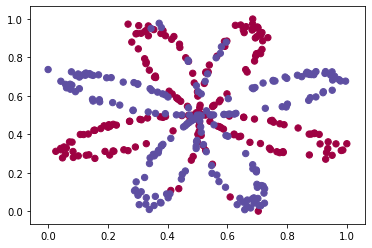

In [7]:
plt.scatter(X.T.iloc[0, :], X.T.iloc[1, :], c=y, s=40, cmap=plt.cm.Spectral);

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [10]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

C:\Users\Zigorat\Anaconda3\envs\env_cxr\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier()

Text(0.5, 1.0, 'MLPClassifier')

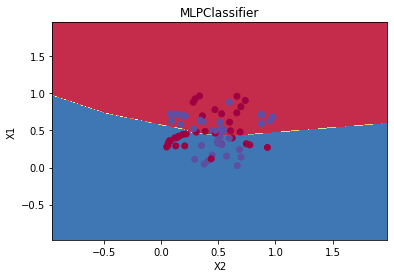

In [11]:
plot_prediction(lambda x: mlp.predict(x), X_test, y_test)
plt.title("MLPClassifier")

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[16 19]
 [29 16]]
              precision    recall  f1-score   support

         0.0       0.36      0.46      0.40        35
         1.0       0.46      0.36      0.40        45

    accuracy                           0.40        80
   macro avg       0.41      0.41      0.40        80
weighted avg       0.41      0.40      0.40        80



In [13]:
mlp = MLPClassifier(activation='relu',hidden_layer_sizes=(50,50,50),max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=1000)

Text(0.5, 1.0, 'MLPClassifier')

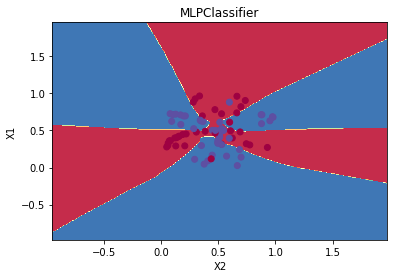

In [14]:
plot_prediction(lambda x: mlp.predict(x), X_test, y_test)
plt.title("MLPClassifier")

In [15]:
predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[32  3]
 [15 30]]
              precision    recall  f1-score   support

         0.0       0.68      0.91      0.78        35
         1.0       0.91      0.67      0.77        45

    accuracy                           0.78        80
   macro avg       0.79      0.79      0.77        80
weighted avg       0.81      0.78      0.77        80



In [ ]:
# Q2

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing

Banknote_data = pd.read_csv('Banknote.csv', sep=',',
                            names = ['x1'
                            ,'x2'
                            ,'x3'
                            ,'x4'
                            ,'class'])
Banknote_data_df = pd.DataFrame(Banknote_data)

head = Banknote_data_df.head()
head

,x1,x2,x3,x4,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [17]:
min_max_scaler = preprocessing.MinMaxScaler()
Banknote_data_df = min_max_scaler.fit_transform(Banknote_data_df)
Banknote_data_df = pd.DataFrame(Banknote_data_df)
Banknote_data_df.columns=['x1'
                            ,'x2'
                            ,'x3'
                            ,'x4'
                          ,'class']
Banknote_data_df

,x1,x2,x3,x4,class
0,0.769004,0.839643,0.106783,0.736628,0.0
1,0.835659,0.820982,0.121804,0.644326,0.0
2,0.786629,0.416648,0.310608,0.786951,0.0
3,0.757105,0.871699,0.054921,0.450440,0.0
4,0.531578,0.348662,0.424662,0.687362,0.0
...,...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398,1.0
1368,0.407690,0.332868,0.506753,0.808350,1.0
1369,0.237385,0.011768,0.985603,0.524755,1.0
1370,0.250842,0.201701,0.761587,0.660675,1.0


In [18]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(Banknote_data_df.iloc[:,:-1])

In [19]:
labels = kmeans.predict(Banknote_data_df.iloc[:,:-1])
labels

array([1, 1, 0, ..., 0, 0, 0])

In [20]:
centroids = kmeans.cluster_centers_
centroids

array([[0.52604643, 0.41660946, 0.40973966, 0.78947805],
       [0.5525675 , 0.76304336, 0.16250462, 0.54478813]])

C:\Users\Zigorat\Anaconda3\envs\env_cxr\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


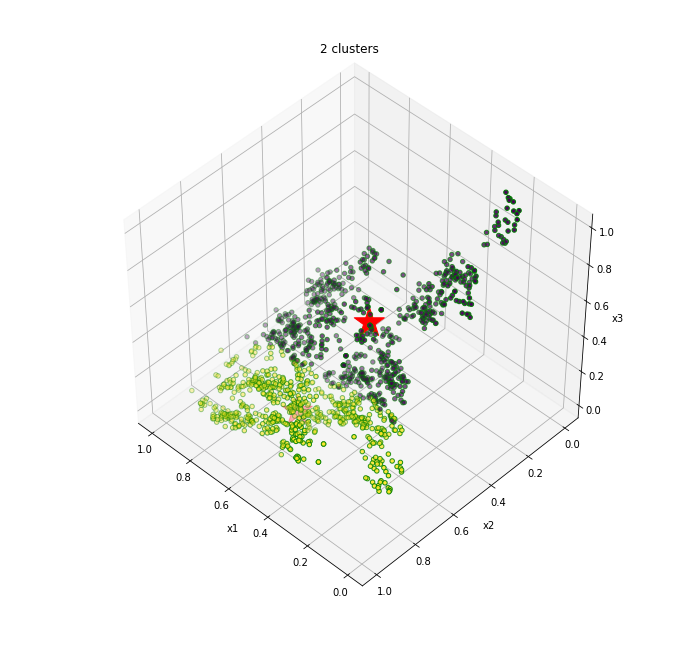

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(1, figsize=(10, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(Banknote_data_df.iloc[:,0], Banknote_data_df.iloc[:,1], Banknote_data_df.iloc[:,2],
               c=labels, edgecolor='G')
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids_z = centroids[:,2]
ax.scatter(centroids_x, centroids_y, centroids_z, marker='*', c ='red', s=1000)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('2 clusters')
ax.dist = 12
fig.savefig('1.png', bbox_inches='tight')

In [22]:
print("Accuracy = ", kmeans.inertia_)

Accuracy =  138.14646004812528


In [23]:
Accuracy = []
for k in range(1,6):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(Banknote_data_df)
    Accuracy.append(kmeans.inertia_)

Accuracy

[559.8299653599079,
 176.51602058157988,
 132.26375303529653,
 90.34823085083573,
 73.48305162077807]

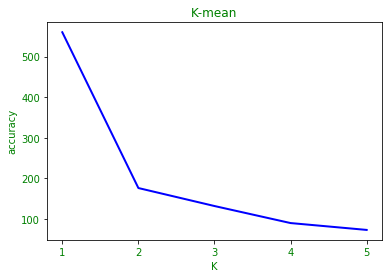

In [24]:
plt.figure()
plt.xticks([0,1,2,3,4],[1,2,3,4,5])
plt.plot(Accuracy, color="blue", linewidth=2)
plt.xlabel("K",c="green")
plt.ylabel("accuracy",c="green")
plt.yticks(c= 'green')
plt.xticks(c= 'green')
plt.title("K-mean",c="green")
plt.show()

In [ ]:
# Q3

In [25]:
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

iris_data = datasets.load_iris()

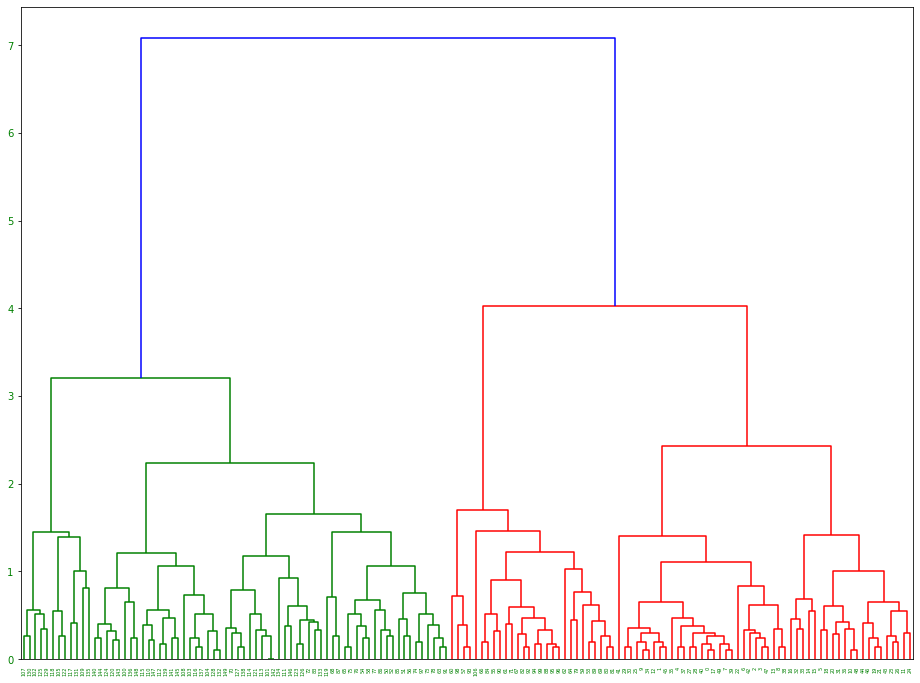

In [26]:
linkage = linkage(iris_data.data, 'complete')
plt.figure(figsize=(16,12))
dendrogram(linkage)
plt.yticks(c= 'green')
plt.xticks(c= 'green')
plt.savefig('1.png', bbox_inches='tight')
plt.show()

In [27]:
print(" Level 6  \n")
clusters = fcluster(linkage, 6, criterion="distance")
clusters

 Level 6  



array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

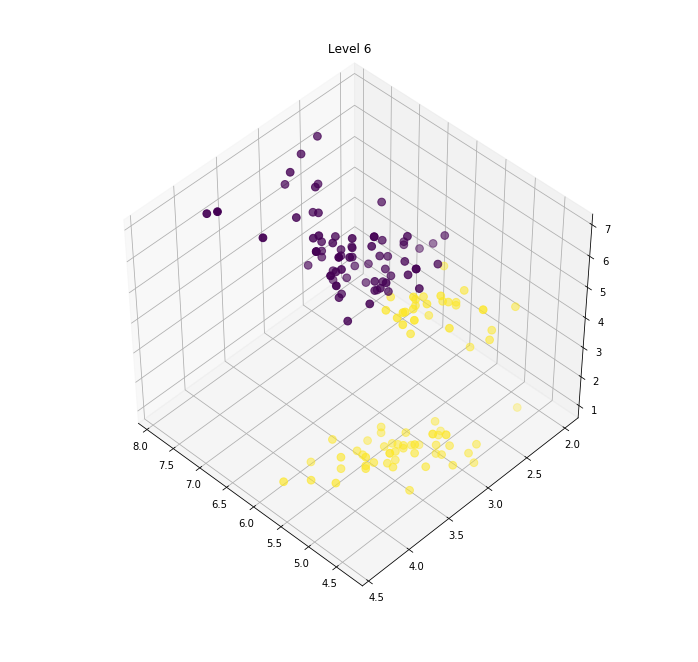

In [28]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1, figsize=(10, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(iris_data.data[:,0], iris_data.data[:,1], iris_data.data[:,2],
               c=clusters,s=60)
ax.dist = 12
ax.set_title("Level 6")
fig.savefig('2.png', bbox_inches='tight')

In [29]:
print(" Level 3  \n")
clusters = fcluster(linkage, 3, criterion="distance")
clusters

 Level 3  



array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 1, 2, 2, 1, 3, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

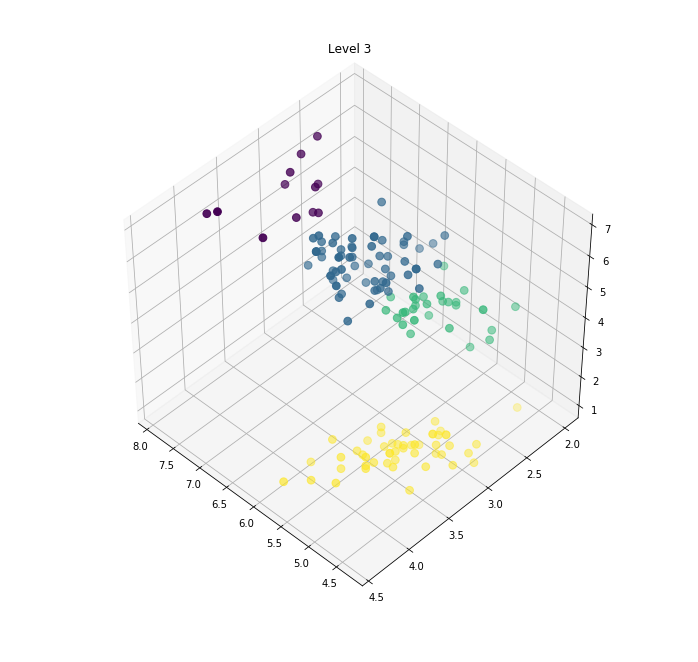

In [30]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(1, figsize=(10, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(iris_data.data[:,0], iris_data.data[:,1], iris_data.data[:,2],
               c=clusters,s=60)
ax.dist = 12
ax.set_title("Level 3")
fig.savefig('2.png', bbox_inches='tight')